<h1>CREDIT CARD FRAUD DETECTION KAGGLE PROJECT</h1>
<h3>By AARUSH SETH</h3>
<p>The aim of this project is to predict the fraud transactions through credit cards of a bank.
        We will use Machine Learning Algorithms to do this task.
</p>

<h4>IMPORTING PACKAGES</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestRegressor,IsolationForest
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor

<h4>IMPORT DATA</h4>

In [2]:
df=pd.read_csv('E:\kaggle projects\credit card fraud detection\creditcard.csv')
df   #class=0 for valid transactions and class=1 for fraud transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<h4>DATA EXPLORATION</h4>

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
#finding the no. of rows and columns
print("(rows,columns)=",df.shape)

(rows,columns)= (284807, 31)


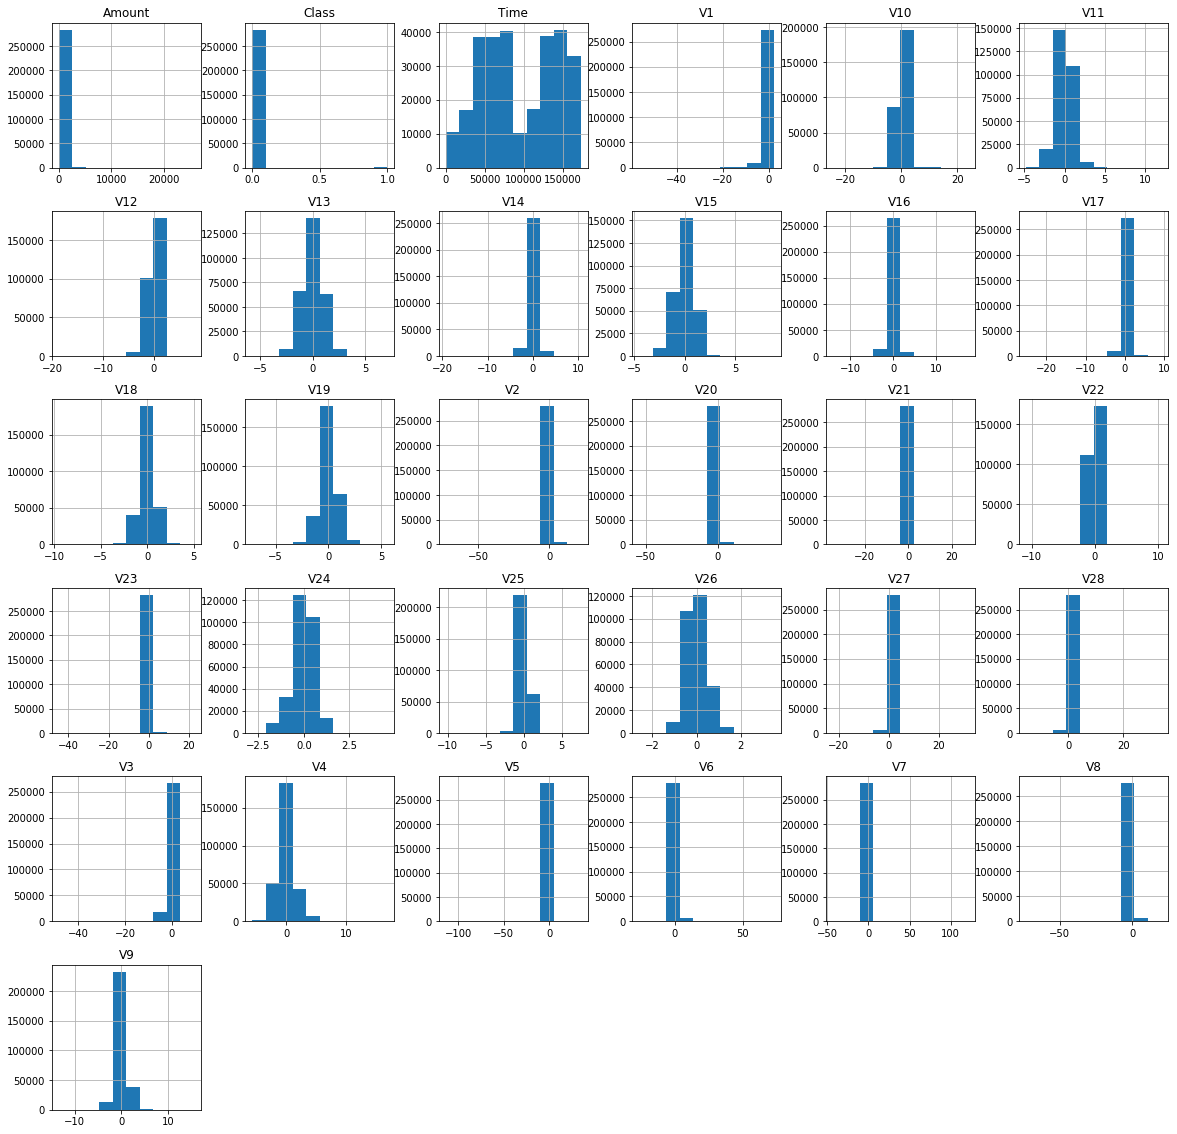

In [5]:
#histograms for each parameters
df.hist(figsize=(20,20))
plt.show()

<p>From the class histogram, we can observe that there are more valid transactions than fraud transactions</p>

<p>Here, we can observe that there are no missing values in the dataframe.
    So, we will not perform the data cleaning step.This data is perfect for data pre-processing</p>

<h4>DATA PRE-PROCESSING</h4>

In [6]:
#finding no. of fraud and valid cases
fraud=df.loc[df['Class']==1]['Class'].count()   #class=1 are fraud transactions
valid=df.loc[df['Class']==0]['Class'].count()   #class=0 are valid transactions
print('fraud cases=',fraud)
print('valid cases=',valid)
print('total=',fraud+valid)
outlier_fraction=fraud/valid
print('percentage of fraud v valid transactions: ',outlier_fraction*100)

fraud cases= 492
valid cases= 284315
total= 284807
percentage of fraud v valid transactions:  0.17304750013189596


In [7]:
#we will predict class
x=df.drop(columns=['Class'])
y=df['Class']   #target class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [8]:
x_train.shape

(227845, 30)

In [9]:
x_test.shape

(56962, 30)

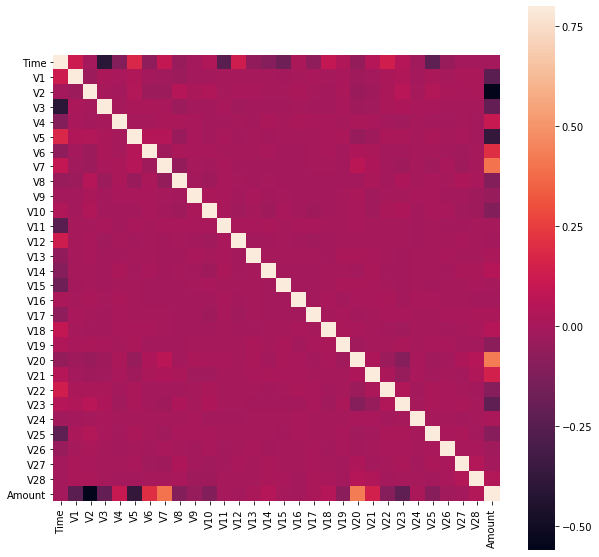

In [10]:
#correlation matrix
corr_mat=x_test.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,vmax=0.8, square=True)
plt.show()

<p>On heat map,the values are correlated with the coloured regions. Less than 0 regions have negatively correlated values and greater than 0 regions have positively correlated values. 0 regions have no coorelated values. So, we can observe that there are max. no correlated regions.</p>

In [11]:
#isolation forest 
IF=IsolationForest(max_samples=len(x),contamination=outlier_fraction,random_state=1)
IF.fit(x_train,y_train)
score_pred=IF.decision_function(x_test)
y_pred=IF.predict(x_test)
n_errors = (y_pred != y_test).sum()
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('n_errors {}'.format( n_errors))
print('accuracy score',accuracy_score(y_test, y_pred))
print('classification report\n',classification_report(y_test, y_pred))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:274: UserWarning: max_samples (284807) is greater than the total number of samples (227845). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


n_errors 56908
accuracy score 0.9979811102138267
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.34      0.36      0.35        85

    accuracy                           1.00     56962
   macro avg       0.67      0.68      0.67     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
#local outlier factor
lf=LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
y_pred1 = lf.fit_predict(x_test)
scores_pred = lf.negative_outlier_factor_
n_errors = (y_pred1 != y_test).sum()
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1
print('n_errors {}'.format( n_errors))
print('accuracy score',accuracy_score(y_test, y_pred1))
print('classification report\n',classification_report(y_test, y_pred1))

n_errors 56877
accuracy score 0.9967697763421228
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        85

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:
#error finding
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root of Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.0020188897861732383
Mean Squared Error: 0.0020188897861732383
Root of Mean Squared Error: 0.044932057444248406


In [14]:
#random forest regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predr = rf.predict(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
result_rf=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_predr
})
result_rf['Difference']=y_test-y_predr
result_rf

,Actual,Predicted,Difference
230723,0,0.0,0.0
23674,0,0.0,0.0
48768,0,0.0,0.0
75239,0,0.0,0.0
114543,0,0.0,0.0
210837,0,0.0,0.0
164821,0,0.0,0.0
124276,0,0.0,0.0
184823,0,0.0,0.0
84067,0,0.0,0.0


In [16]:
# gradient boosting regressor
gbr=GradientBoostingRegressor( loss = 'huber',learning_rate=0.001,n_estimators=400, max_depth=6
                              ,subsample=1, verbose=False,random_state=126) 
gbr.fit(x_train,y_train)
y_predg=gbr.predict(x_test)
y_predg

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
accuracy_score(y_predg,y_test)

0.9985077771145676

<p>From the accuracy score, we can predict that how much percent we have used the correct approach for data pre-processing</p>

In [18]:
#linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)
y_predl=lm.predict(x_test)
y_predl

array([ 0.001599  ,  0.00117185, -0.00058935, ...,  0.00413682,
        0.00047731, -0.00618128])

In [20]:
result_lm=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_predl
})
result_lm['Difference']=y_test-y_predl
result_lm.head()

,Actual,Predicted,Difference
230723,0,0.001599,-0.001599
23674,0,0.001172,-0.001172
48768,0,-0.000589,0.000589
75239,0,0.002211,-0.002211
114543,0,0.000198,-0.000198
